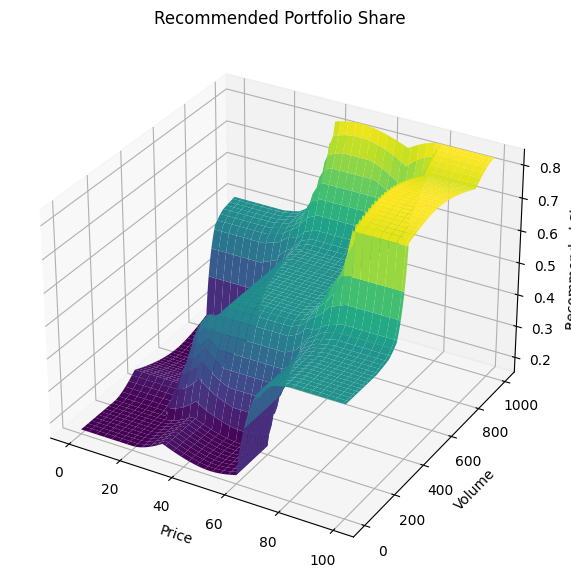

In [6]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Вхідні змінні
price = ctrl.Antecedent(np.arange(0, 101, 1), 'price')
volume = ctrl.Antecedent(np.arange(0, 1001, 1), 'volume')

# Вихідна змінна
recommended_share = ctrl.Consequent(np.arange(0, 1.1, 0.1), 'recommended_share')

# Функції належності для price
price['low'] = fuzz.trapmf(price.universe, [0, 0, 20, 40])
price['medium'] = fuzz.trimf(price.universe, [20, 50, 80])
price['high'] = fuzz.trapmf(price.universe, [60, 80, 100, 100])

# Функції належності для volume
volume['low'] = fuzz.trapmf(volume.universe, [0, 0, 200, 400])
volume['medium'] = fuzz.trimf(volume.universe, [200, 600, 1000])
volume['high'] = fuzz.trapmf(volume.universe, [800, 1000, 1000, 1000])

# Функції належності для recommended_share
recommended_share['low'] = fuzz.trimf(recommended_share.universe, [0, 0, 0.5])
recommended_share['medium'] = fuzz.trimf(recommended_share.universe, [0, 0.5, 1])
recommended_share['high'] = fuzz.trimf(recommended_share.universe, [0.5, 1, 1])

# Правила
rule1 = ctrl.Rule(price['high'] & volume['high'], recommended_share['high'])
rule2 = ctrl.Rule(price['low'] & volume['low'], recommended_share['low'])
rule3 = ctrl.Rule(price['medium'] & volume['medium'], recommended_share['medium'])
rule4 = ctrl.Rule(price['high'] & volume['low'], recommended_share['medium'])
rule5 = ctrl.Rule(price['low'] & volume['high'], recommended_share['medium'])
rule6 = ctrl.Rule(price['medium'] & volume['low'], recommended_share['low'])
rule7 = ctrl.Rule(price['medium'] & volume['high'], recommended_share['high'])
rule8 = ctrl.Rule(price['high'] & volume['medium'], recommended_share['high'])
rule9 = ctrl.Rule(price['low'] & volume['medium'], recommended_share['low'])

# Створення системи контролю
share_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
share_simulation = ctrl.ControlSystemSimulation(share_ctrl)

# Моделювання поверхні за алгоритмом Сугено

x_price = np.arange(0, 101, 1)
y_volume = np.arange(0, 1001, 1)
X, Y = np.meshgrid(x_price, y_volume)
Z_share = np.zeros_like(X, dtype=float)

for i in range(len(x_price)):
    for j in range(len(y_volume)):
        share_simulation.input['price'] = x_price[i]
        share_simulation.input['volume'] = y_volume[j]
        share_simulation.compute()
        Z_share[j, i] = share_simulation.output['recommended_share']

# Візуалізація поверхні в 3D стилі
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z_share, cmap='viridis')

ax.set_title('Recommended Portfolio Share')
ax.set_xlabel('Price')
ax.set_ylabel('Volume')
ax.set_zlabel('Recommended Share')

plt.show()